# 智能音箱（Speaker）

In [ ]:
#环境： conda docker38 （python 3.8.12）

In [ ]:
'''
注意：
1. 相应模型要手工下载；
2. 模型准确度待提高

'''

In [1]:
!mkdir ./data/speaker
!mkdir ./data/speaker/external-libraries
!mkdir ./data/speaker/temp

mkdir: ./data/speaker: File exists
mkdir: ./data/speaker/external-libraries: File exists
mkdir: ./data/speaker/temp: File exists


In [1]:
import sys 

sys.path.append('./data/speaker/external-libraries')

audio_file = "data/speaker/temp/recoder1.wav"

## 一、声音输入

### 1.录音

In [2]:
from IPython.display import Audio

from robot.recode import Recoder # self


In [3]:
recoder = Recoder()

In [4]:
# 录音：今天天气怎么样？
recoder.recode(60)# 声音长度

audio_file = "data/speaker/temp/recoder1.wav"

recoder.save(audio_file)

#Audio(file_dir)#, rate=sample_rate)

开始录音
录音结束
Recode a piece of  voice successfully!!


In [5]:
# buff = recoder.buffer()

In [11]:
# import numpy as np 
# from IPython.display import Audio

# clean1 = buff# (buff.tostring('hex'))
# print(clean1)
# #Audio(clean1, rate=16000)

||PaMacCore (AUHAL)|| Error on line 2490: err='-10863', msg=Audio Unit: cannot do in current context


## 二、声音文件分析

### 1.分析声音特征

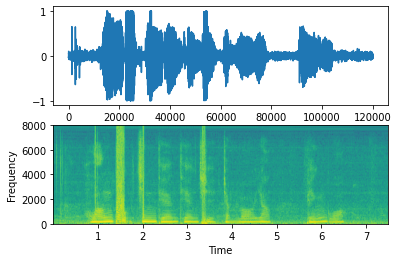

In [13]:
import matplotlib.pyplot as plt
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

# 原始音频
clean = read_audio(audio_file).squeeze()

# Plots
plt.subplot(211)
plt.plot(clean) #数值
plt.xlabel('Time')

plt.subplot(212)
plt.specgram(clean,Fs=16000)# specgram()函数用于绘制频谱图。
plt.xlabel('Time')
plt.ylabel('Frequency')

Audio(clean, rate=16000)

In [14]:
clean

tensor([-0.0359, -0.0480, -0.0396,  ...,  0.0429,  0.0412,  0.0184])

### 2.检测声音是否活动

In [7]:
from robot.audio_pre import AudioPre # self

In [8]:
ck = AudioPre()

In [16]:
%%time
num = ck.get_chunks_num(audio_file)
min_num = 100 # 参数：是否有声音的界限
if num > min_num:
    print("检测声音是否活动:有声音")
else:
    print("检测声音是否活动:没有声音")
print("num:",num)

segment_001  0.00  7.48 SPEECH
检测声音是否活动:有声音
num: 750
CPU times: user 735 ms, sys: 52.3 ms, total: 788 ms
Wall time: 622 ms


### 3.声音转文字

In [10]:
from robot.audio_asr import AudioASR

In [11]:
from robot.audio_asr import AudioASR

asr = AudioASR()

/Users/liampro/Downloads/pro/git/ai-liam/robot/./data/speaker/external-libraries/transformers/configuration_utils.py:340: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [17]:
%%time
audio_text = asr.transcription_text(audio_file,rate=16000)
print("声音转文字:",audio_text) # 模型token不够量 (声音转文字: 绿<unk>今天天气怎么<unk>)

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


声音转文字: 今天天气蒋中样和展来
CPU times: user 4.67 s, sys: 143 ms, total: 4.81 s
Wall time: 3.71 s


## 三、声音其它任务

### 1.语音所属语种

In [18]:
from robot.audio_lang_id import AudioLangID

In [19]:
lang = AudioLangID()

In [20]:
label,idx = lang.predict(audio_file)
print("lang:",label," index:",idx)

lang: Chinese_Taiwan  index: 38


### 2.声纹输入

In [22]:
# 输入源声音
audio_file_my = "data/speaker/temp/my_recoder1.wav"

recoder.recode(60)# 声音长度
recoder.save(audio_file_my)

开始录音
录音结束
Recode a piece of  voice successfully!!


### 3.声纹判断

In [23]:
from robot.audio_person_id import AudioPersonID

person = AudioPersonID()

In [24]:
# 录入检查的声音
audio_file_test = "data/speaker/temp/ck_temp1.wav"

recoder.recode(50)# 声音长度
recoder.save(audio_file_test)

开始录音
录音结束
Recode a piece of  voice successfully!!


In [25]:
# 比较2个声音（同人）
score, prediction = person.predict(audio_file_test,audio_file_my)

In [26]:
print(":",float(score), " p:",bool(prediction))

: 0.30462801456451416  p: True


In [18]:
# 不同人
# person.predict("data/speaker/temp/1.wav",audio_file_my)

(tensor(0.0333), tensor(False))

## 四、NLP分析

### 1.任务分类

In [27]:
from robot.nlp_classifier import NLPClassifier 

In [28]:
nc = NLPClassifier()

In [29]:
%%time
nc_predict = nc.predict([audio_text])
print("分类预测:",nc_predict)

分类预测: [{'label': 'culture', 'score': 0.5556991100311279}]
CPU times: user 276 ms, sys: 349 ms, total: 625 ms
Wall time: 12.2 s


### 2.问答模型

In [30]:
from robot.nlp_chat import NLPChat

In [31]:
chat = NLPChat()

In [27]:
# ts1,question,answer = chat.dialog("你们宿舍都是这么厉害的人吗",[] )
# ts1,question,answer = chat.dialog("今天好点了吗？",ts1 )
# ts1,question,answer = chat.dialog("加油，三月动起来，五月笑起来",ts1 )
# ts1,question,answer = chat.dialog("好身材，秀出来",ts1)

In [32]:
ts1,question,answer = chat.dialog("今天天气怎么样？",[] )

print(question,"\n",answer)

----------------------------------------------------------------------------------------------------
Question: 今天天气怎么样？<|endoftext|>
Answer: 对啊这是今天中午三点
今天天气怎么样？ 
 对啊这是今天中午三点


## 五、TTS(输出声音)

### 1.直接播放声音

In [33]:
from robot.audio_tts import AudioTTS

In [34]:
tts = AudioTTS()

In [35]:
say_text = "主人，今天天气很好，适合和朋友出去玩！"#'你是我的太阳，我是你的星星～'
#file_path = './data/speaker/temp/tts1.wav'

#tts.say_and_save('你是我的太阳，我是你的星星～',file_path)

In [36]:
%%time
tts.say(say_text)

准备开始语音播报...
CPU times: user 12.9 ms, sys: 6.35 ms, total: 19.2 ms
Wall time: 6.15 s


In [8]:
# %%time
# tts.save(say_text,file_path)

准备开始语音保存...
CPU times: user 4.38 ms, sys: 4.37 ms, total: 8.75 ms
Wall time: 59 ms


## 环境安装

In [ ]:
#!pip install matplotlib -i https://mirrors.aliyun.com/pypi/simple/ -t data/speaker/external-libraries

In [28]:
!pip install -r robot/requirements.txt -t data/speaker/external-libraries

  Using cached numpy-1.20.0-cp38-cp38-macosx_10_9_x86_64.whl (16.0 MB)
  Using cached PyAudio-0.2.11-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached Pillow-8.4.0-cp38-cp38-macosx_10_10_x86_64.whl (3.0 MB)
  Using cached opencv_python-4.5.4.58-cp38-cp38-macosx_10_15_x86_64.whl (45.5 MB)
  Using cached Cython-0.29.24-cp38-cp38-macosx_10_9_x86_64.whl (1.9 MB)
  Using cached matplotlib-3.4.3-cp38-cp38-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached speechbrain-0.5.10-py3-none-any.whl (393 kB)
  Using cached datasets-1.14.0-py3-none-any.whl (290 kB)
  Using cached transformers-4.12.0-py3-none-any.whl (3.1 MB)
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-macosx_10_5_x86_64.macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.whl (613 kB)
  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached torch-1.10.0-cp38-none-macosx_10_9_x86_64.whl (147.1 MB)
  Using cached torchvision-0.11.1-cp38-cp38-macosx_10_9_x86_64.whl (1.2 MB